In [4]:
#Cargamos librerias
import pandas as pd

# **VISUALIZACIÓN SIMPLE 1**
Se gráfica la relación entre el aumento de uso de las redes sociales y la percepción de los usuarios en como afecta las RRSS a la salud mental

In [5]:
#Cargamos los datos
rrss=pd.read_csv("estudio.csv")
rrss.head()

,Edad,Género,¿Región donde vives?,¿A que te dedicas principalmente?,¿Cuánto tiempo dedicas al uso de redes sociales diariamente?,¿A qué red social dedicas mayor tiempo?,¿A que edad comenzaste a usar redes sociales?,¿Actualmente sufres de alguna afección/enfermedad/trastorno de salud mental?,Si tu respuesta es si del 1 al 5 ¿Cuánto crees que los sintomas de este se han visto acrecentados por el uso de redes sociales?,Del 1 al 5 ¿Cuánto crees que las redes sociales han afectado la salud mental de las personas?,¿Haz aumentado el uso de redes sociales post cuarentena del Covid-19?,Si tu respuesta es si del 1 al 5 ¿Cuánto crees que los sintomas de este se han visto acrecentados por el uso de redes sociales?.1
0,22.0,Masculino,Región Metropolitana,Estudiante Universitario,0 a 2 horas,Instagram,14,No lo sé,3,4,NaN,NaN
1,25.0,Femenino,Región Metropolitana,Trabajador,2 a 4 horas,TikTok,15,Sí,4,5,Sí,4.0
2,21.0,Femenino,Región Metropolitana,Estudiante Universitario,2 a 4 horas,TikTok,10,No,1,5,Sí,NaN
3,23.0,Femenino,Región Metropolitana,Estudiante Universitario,6 a 8 horas,Instagram,14,Sí,4,4,Sí,4.0
4,21.0,Femenino,Región Metropolitana,Estudiante Universitario,6 a 8 horas,Instagram,12,No,1,5,Sí,NaN


In [6]:
#Filtrar Datos de Interés
d1=rrss[['Del 1 al 5 ¿Cuánto crees que las redes sociales han afectado la salud mental de las personas?','¿Haz aumentado el uso de redes sociales post cuarentena del Covid-19?']]
# Cruzamos la información de ambas columnas seleccionadas, se usa utilizando crosstab de la libreria pandas, genera tablas con la distribución de datos relacionados entre varias variables
d2=pd.crosstab(d1['Del 1 al 5 ¿Cuánto crees que las redes sociales han afectado la salud mental de las personas?'],d1['¿Haz aumentado el uso de redes sociales post cuarentena del Covid-19?'])
d2.head()

¿Haz aumentado el uso de redes sociales post cuarentena del Covid-19?,No,Sí
Del 1 al 5 ¿Cuánto crees que las redes sociales han afectado la salud mental de las personas?,,
1,1,8
2,2,2
3,9,34
4,19,59
5,13,63


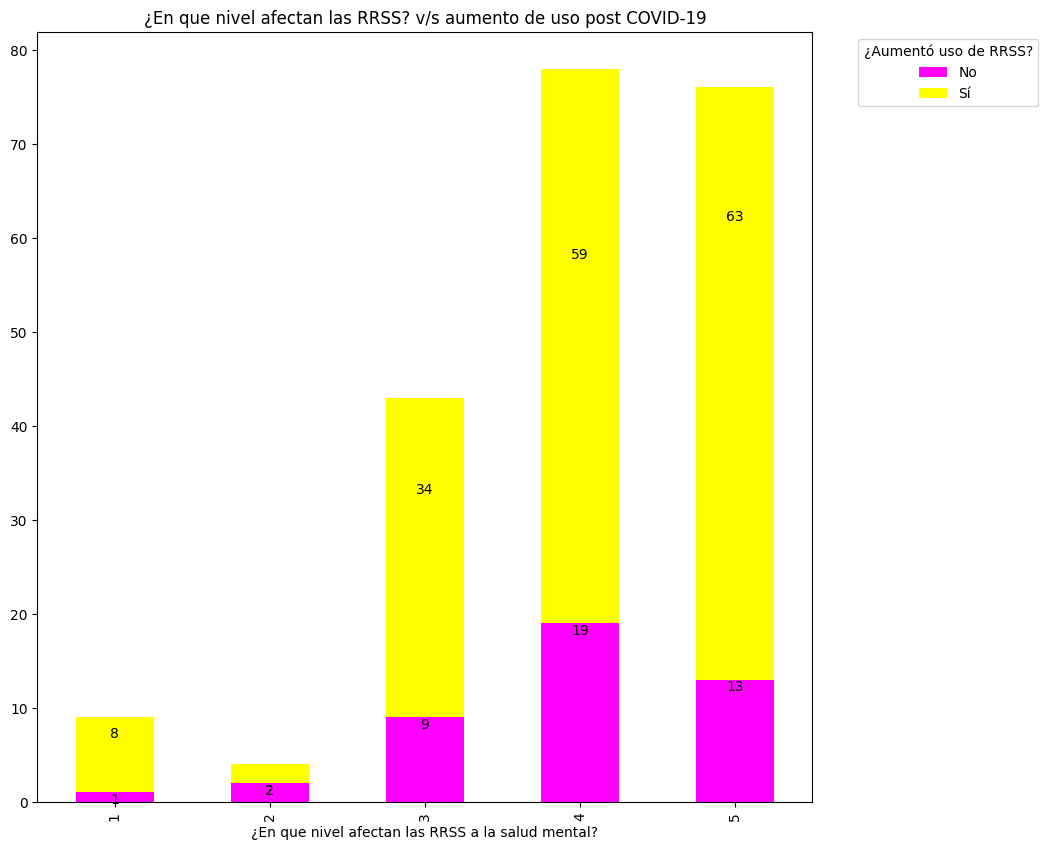

In [7]:
#Crear gráfico de barras
ax=d2.plot(kind='bar',stacked=True,figsize=(10,10),colormap='spring')
#Ajustar Leyenda para que no tope los datos
ax.legend(title='¿Aumentó uso de RRSS?', bbox_to_anchor=(1.05, 1), loc='upper left')
#Agregamos titulos y nombres al eje
ax.set_title('¿En que nivel afectan las RRSS? v/s aumento de uso post COVID-19')
ax.set_xlabel('¿En que nivel afectan las RRSS a la salud mental?')
#Agregamos valores a las barras
for i in ax.patches:
    ax.annotate(str(int(i.get_height())), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='top')

# **VISUALIZACIÓN SIMPLE 2**
Visualizaremos como afectan las RRSS a la salud mental según la edad, para esto veremos como se distribuyen las edades por cada nivel de percepción a través de la separación de graficas por nivel para comparar

In [8]:
#Filtramos los datos
d3=rrss[['Edad','Del 1 al 5 ¿Cuánto crees que las redes sociales han afectado la salud mental de las personas?']]
#Eliminamos datos nulos
d4=d3.dropna(subset=['Edad', 'Del 1 al 5 ¿Cuánto crees que las redes sociales han afectado la salud mental de las personas?'])
#Contamos la cantidad de personas con la misma edad en el nivel de percepcion, y agregamos esos valores al data frame
d5 = d4.groupby('Del 1 al 5 ¿Cuánto crees que las redes sociales han afectado la salud mental de las personas?')['Edad'].value_counts().reset_index()
d5=d5.rename(columns={'Del 1 al 5 ¿Cuánto crees que las redes sociales han afectado la salud mental de las personas?':"Nivel de Impacto"})
d5=d5.rename(columns={'count':"Frecuencia"})
d5.head()

,Nivel de Impacto,Edad,Frecuencia
0,1,23.0,2
1,1,21.0,2
2,1,15.0,1
3,1,20.0,1
4,1,22.0,1


In [9]:
#Cargamos elementos necesarios
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', font='sans-serif', context='notebook', palette='viridis')
%config InlineBackend.figure_format='retina'

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
plt.rcParams["figure.dpi"] = 96


Text(0.5, 0.98, 'Distribución de Edades según Nivel de Impacto')

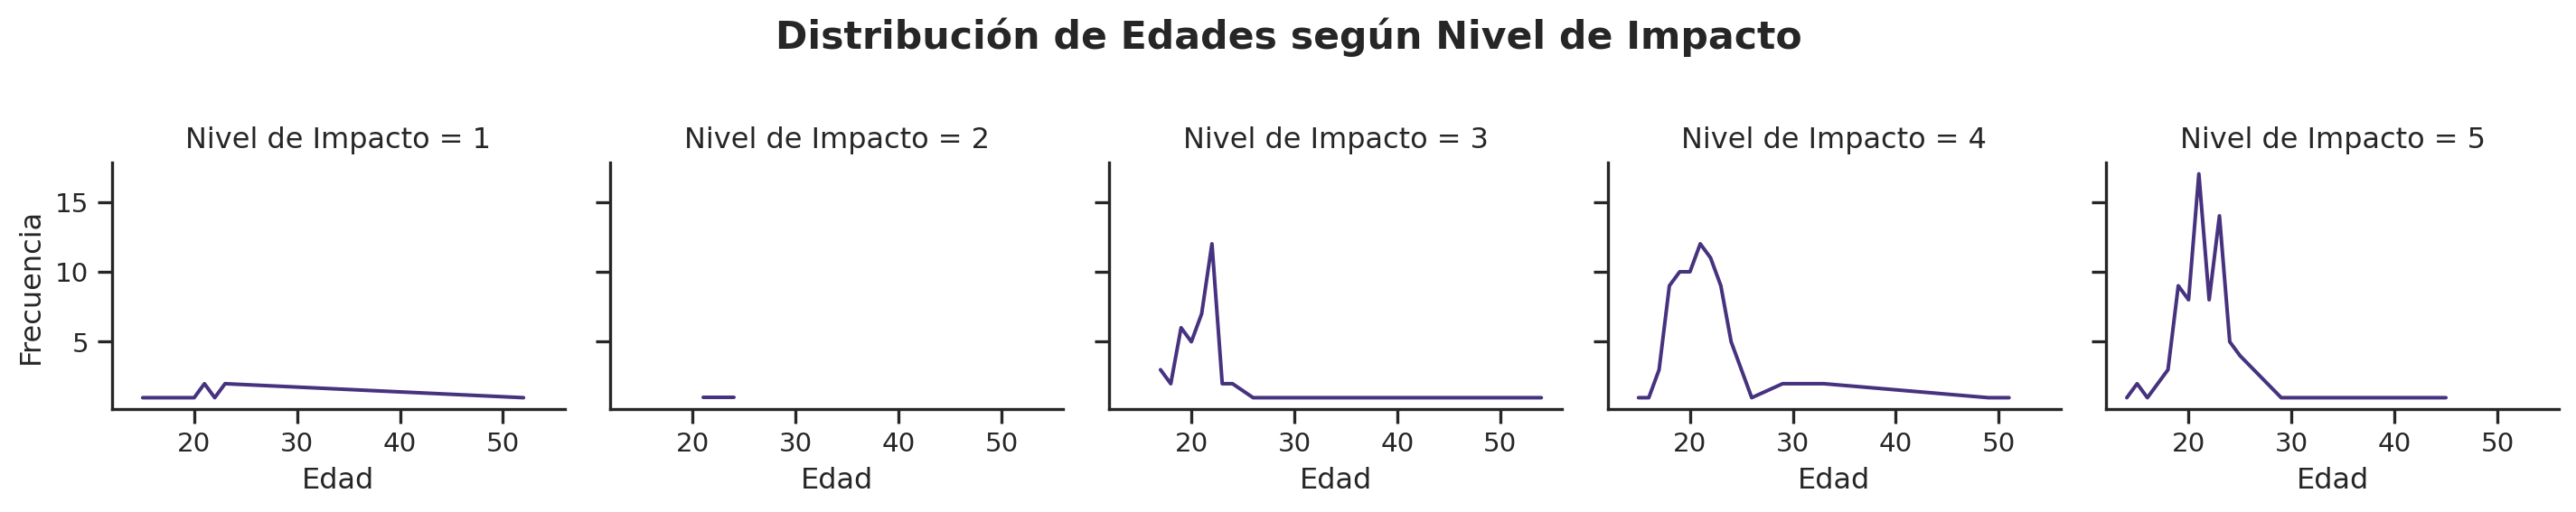

In [10]:
#Creamos un FacetGrid

g = sns.FacetGrid(data=d5.sort_values('Edad'), col='Nivel de Impacto')
g.map(plt.plot,"Edad","Frecuencia")
g.fig.subplots_adjust(top=0.7)
g.fig.suptitle("Distribución de Edades según Nivel de Impacto", fontsize=16, fontweight="bold")

# **VISUALIZACIÓN COMPLEJA 1**
Visualizaremos la relación entre las redes sociales más utilizadas según la edad, separaremos por género, para ello segregaremos por género

In [11]:
#Filtramos los datos
v1=rrss[['Edad','Género','¿A qué red social dedicas mayor tiempo?']]
#Eliminamos datos vacíos
v1=v1.dropna(subset=['Edad'])
#Creamos dos DataFrame según género
f=v1.loc[v1['Género']=='Femenino']
m=v1.loc[v1['Género']=='Masculino']
#Cruzamos los datos
f1=pd.crosstab(f['¿A qué red social dedicas mayor tiempo?'],f['Edad'])

m1=pd.crosstab(m['¿A qué red social dedicas mayor tiempo?'],m['Edad'])

f1.head()

Edad,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,...,25.0,26.0,29.0,33.0,36.0,38.0,43.0,45.0,51.0,52.0
¿A qué red social dedicas mayor tiempo?,,,,,,,,,,,,,,,,,,,,,
Facebook,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Instagram,1,4,2,5,4,15,5,20,12,12,...,2,1,2,2,0,1,1,0,1,1
Pinterest,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TikTok,0,0,0,2,3,2,5,9,7,6,...,1,0,1,0,0,0,0,1,0,0
Twitter,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1920x2880 with 0 Axes>

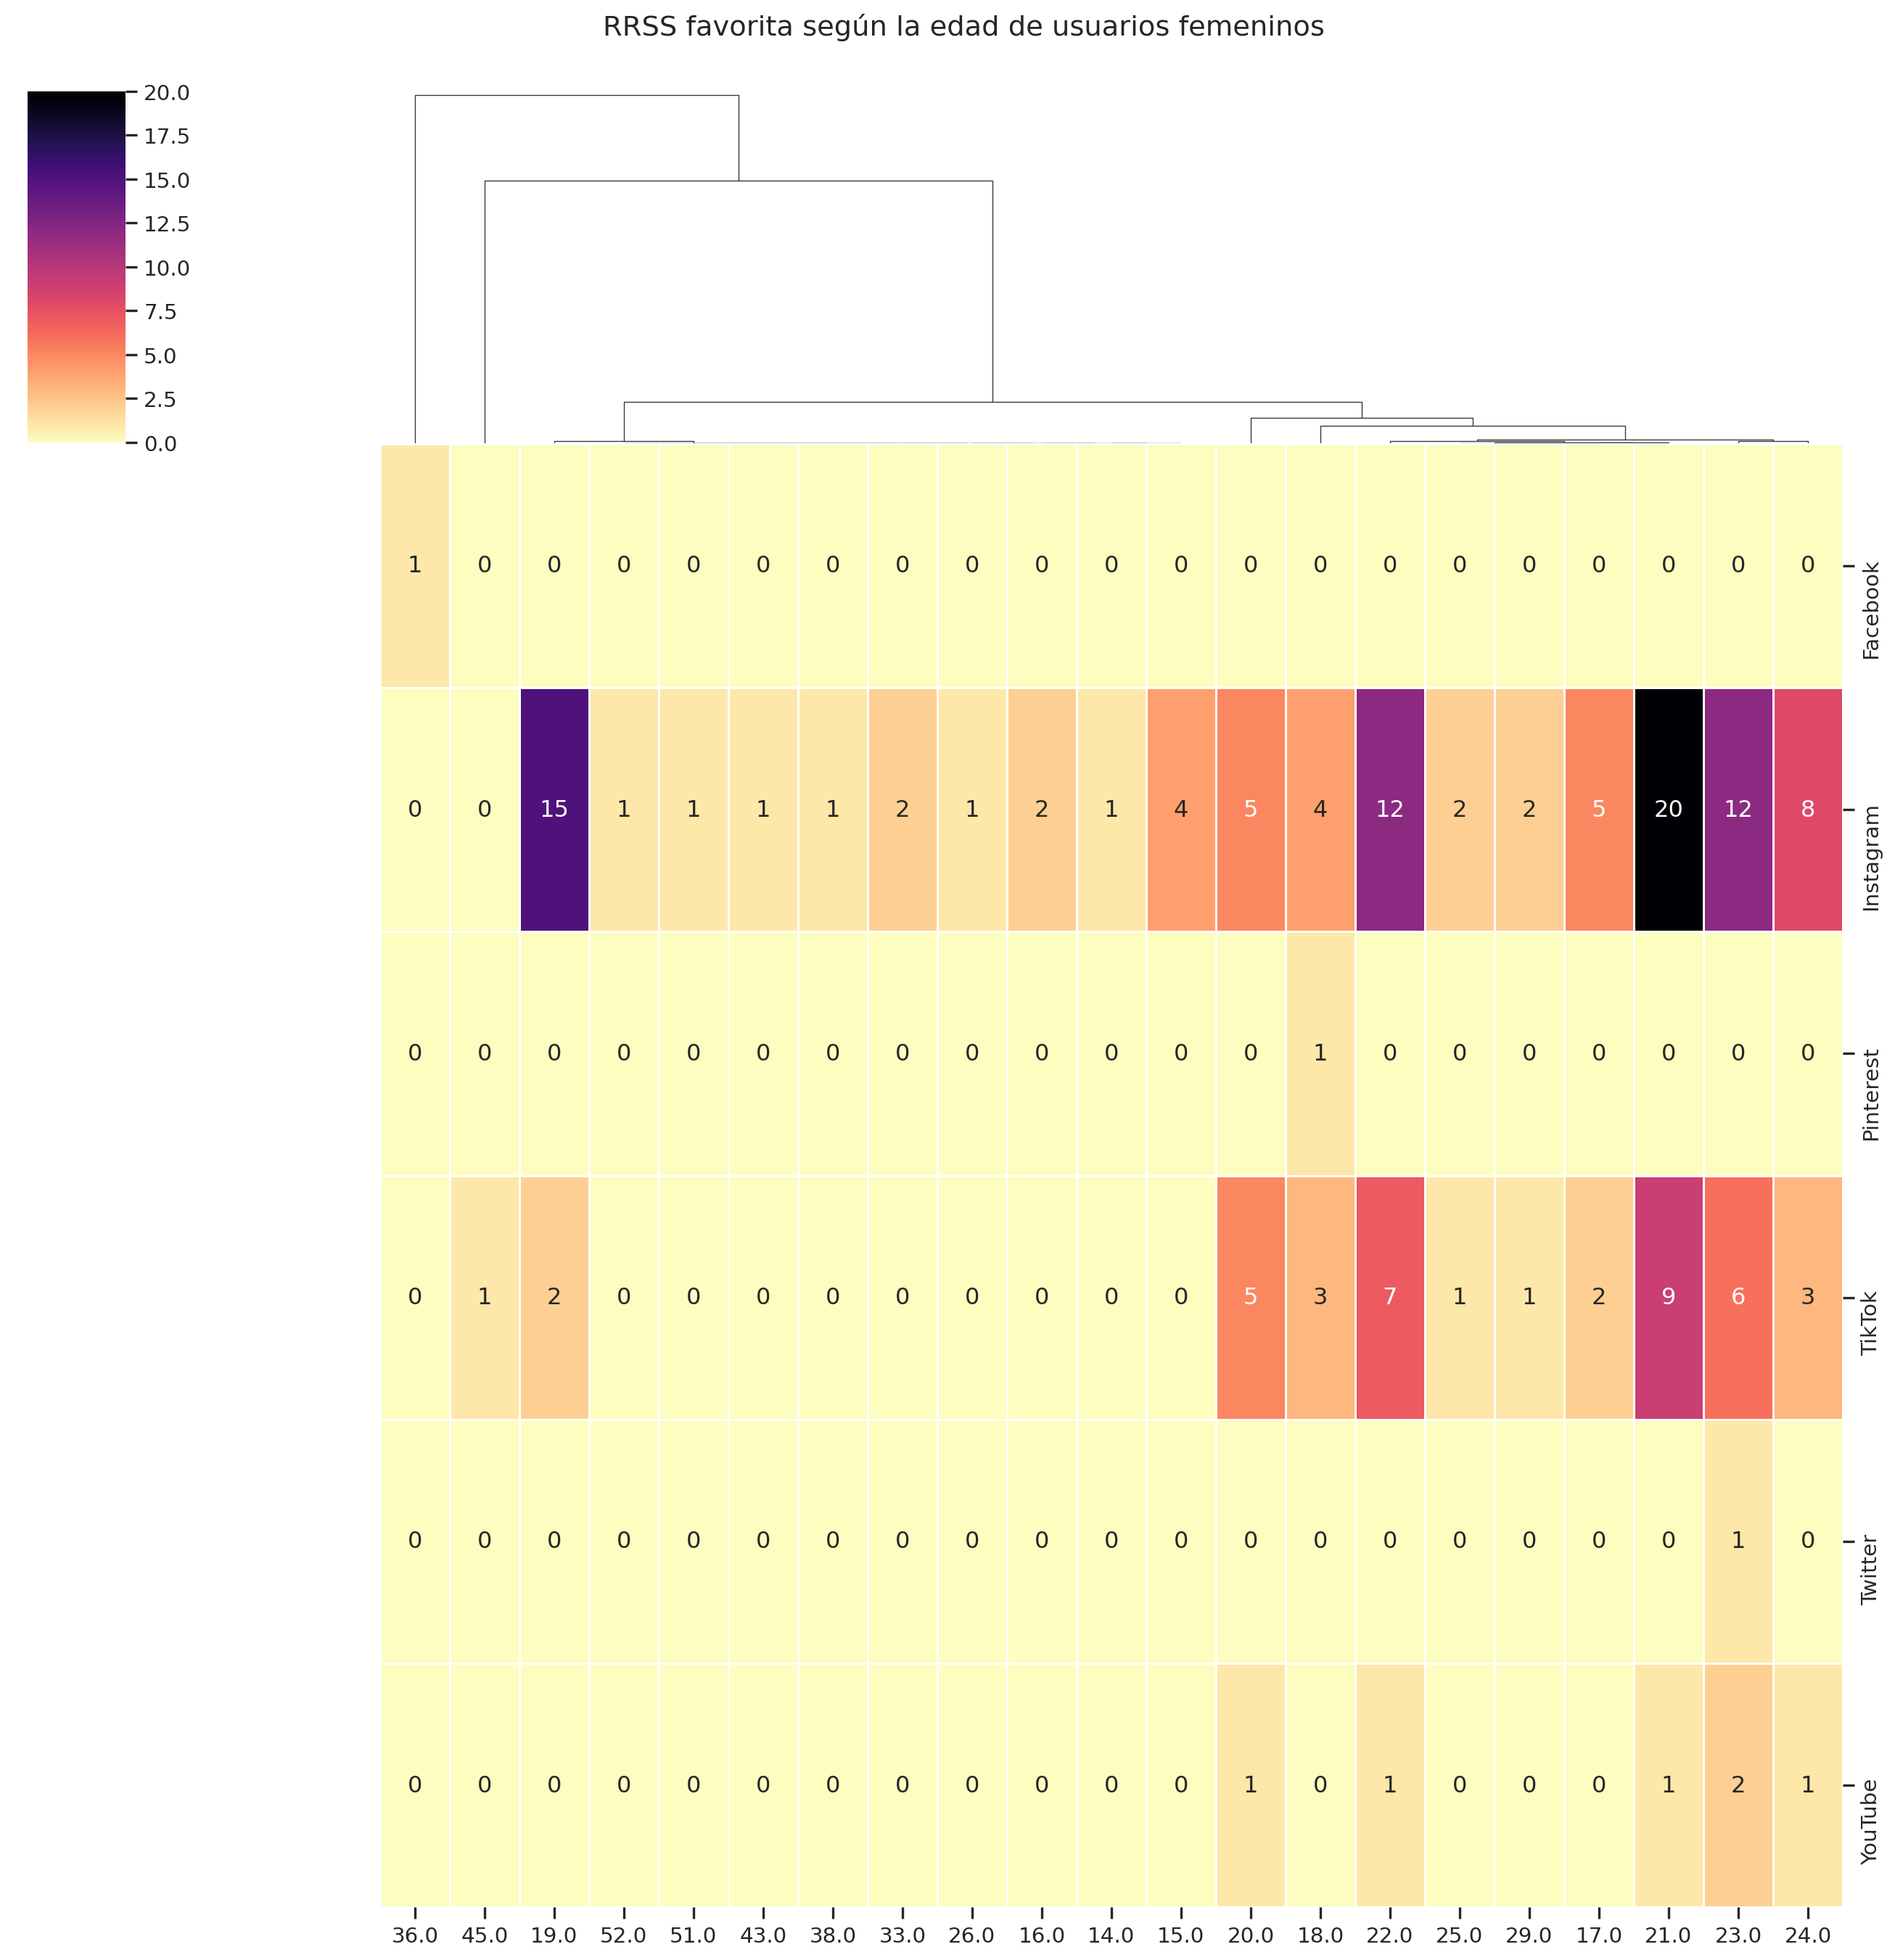

In [12]:
plt.figure(figsize=(20, 30))
g = sns.clustermap(f1, cmap='magma_r', annot=True, figsize=(14,14), linewidth=1, metric='correlation',row_cluster=False)

# Remover las etiquetas de los ejes
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')

# Ajustando titulo
plt.suptitle('RRSS favorita según la edad de usuarios femeninos', y=1.02)
plt.ylabel('')
plt.xlabel('')
plt.show()


Text(0.5, 989.2266666666666, '')

<Figure size 1920x2880 with 0 Axes>

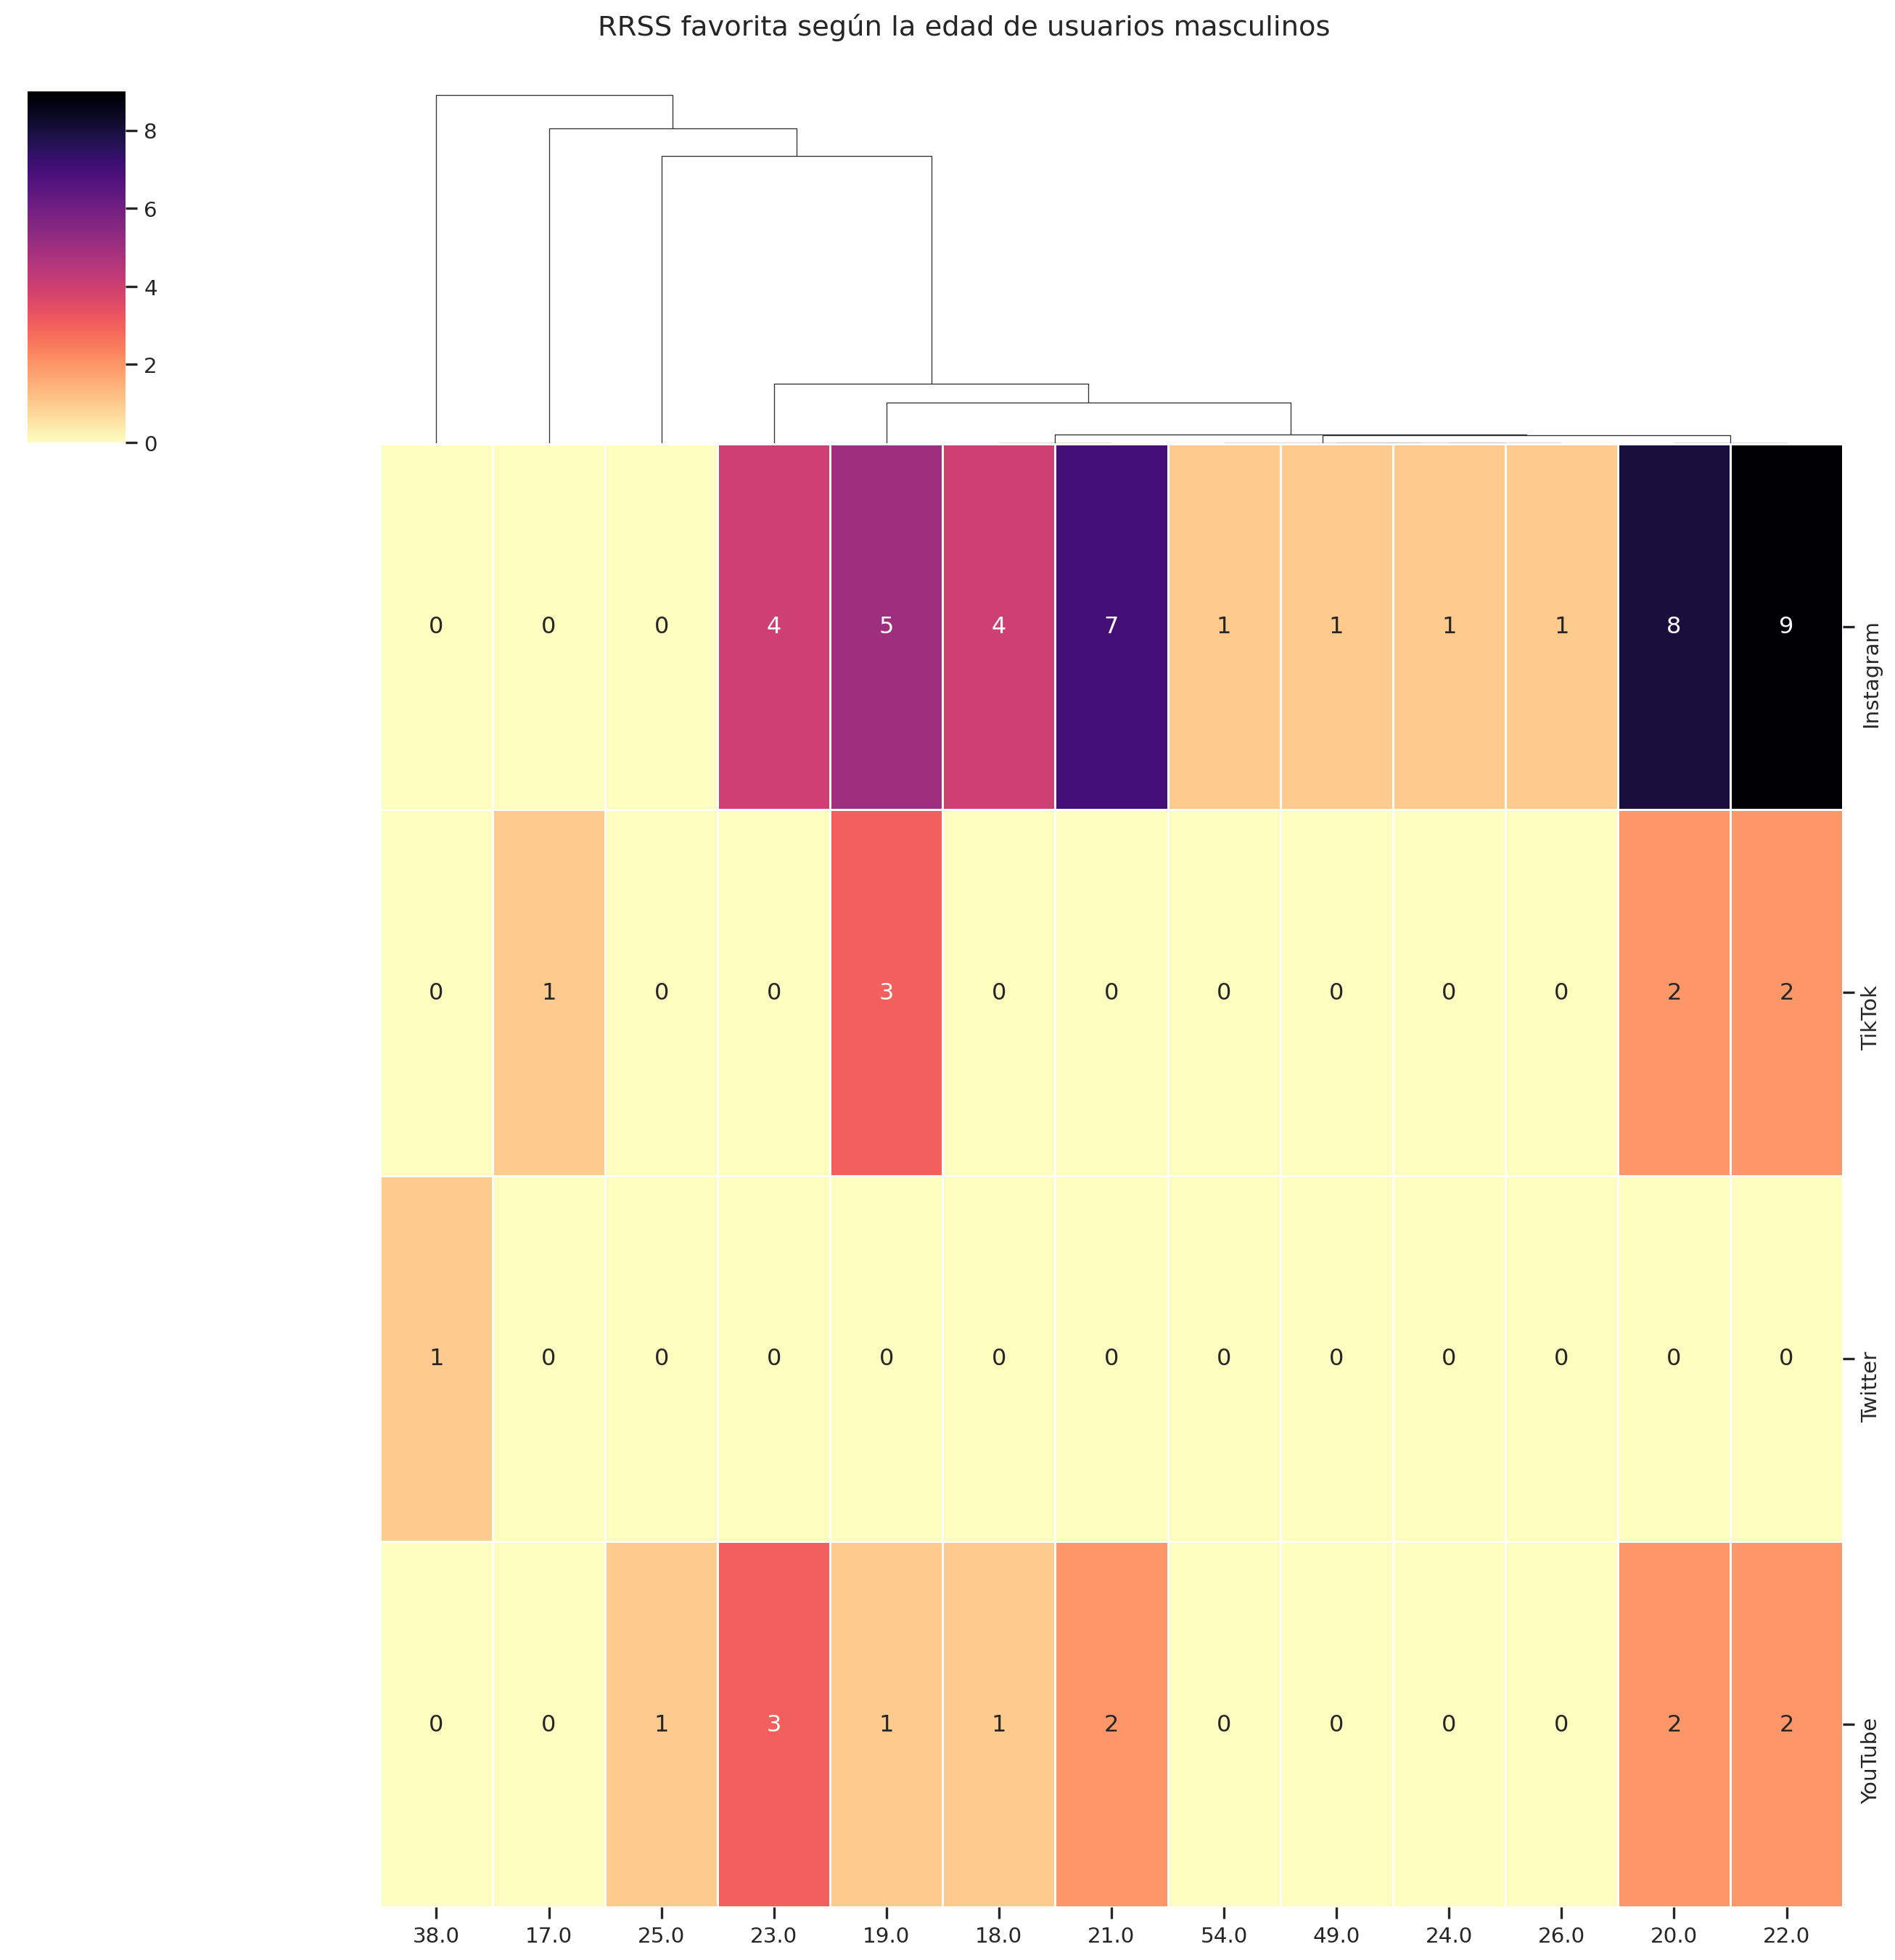

In [13]:
#Hacemos lo mismo pero para el género masculino
#Generamos el Mapa
plt.figure(figsize=(20, 30))
g = sns.clustermap(m1, cmap='magma_r', annot=True, figsize=(14,14), linewidth=1, metric='correlation', row_cluster=False)
# Remover las etiquetas de los ejes
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
#Ajustando titulo
plt.suptitle('RRSS favorita según la edad de usuarios masculinos', y=1.02)
plt.ylabel('')
plt.xlabel('')

# **Visualización Compleja 2**
Visualizaremos que redes sociales son las más utilizadas por cada género y por año de nacimiento de los usuarios


In [14]:
#Filtramos los datos
a=rrss[['Género','¿A qué red social dedicas mayor tiempo?']]
#Agregamos la columna año de nacimiento
a['Año de Nacimiento']=2024-rrss['Edad']

#Creamos dos DataFrame según género
fem=a.loc[a['Género']=='Femenino']
masc=a.loc[a['Género']=='Masculino']
#Cruzamos los datos
fem1= fem.groupby(['Año de Nacimiento', '¿A qué red social dedicas mayor tiempo?']).size().unstack(fill_value=0)
masc1=masc.groupby(['Año de Nacimiento', '¿A qué red social dedicas mayor tiempo?']).size().unstack(fill_value=0)

fem1.head()


<ipython-input-14-a99d805475ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Año de Nacimiento']=2024-rrss['Edad']


¿A qué red social dedicas mayor tiempo?,Facebook,Instagram,Pinterest,TikTok,Twitter,YouTube
Año de Nacimiento,,,,,,
1972.0,0,1,0,0,0,0
1973.0,0,1,0,0,0,0
1979.0,0,0,0,1,0,0
1981.0,0,1,0,0,0,0
1986.0,0,1,0,0,0,0


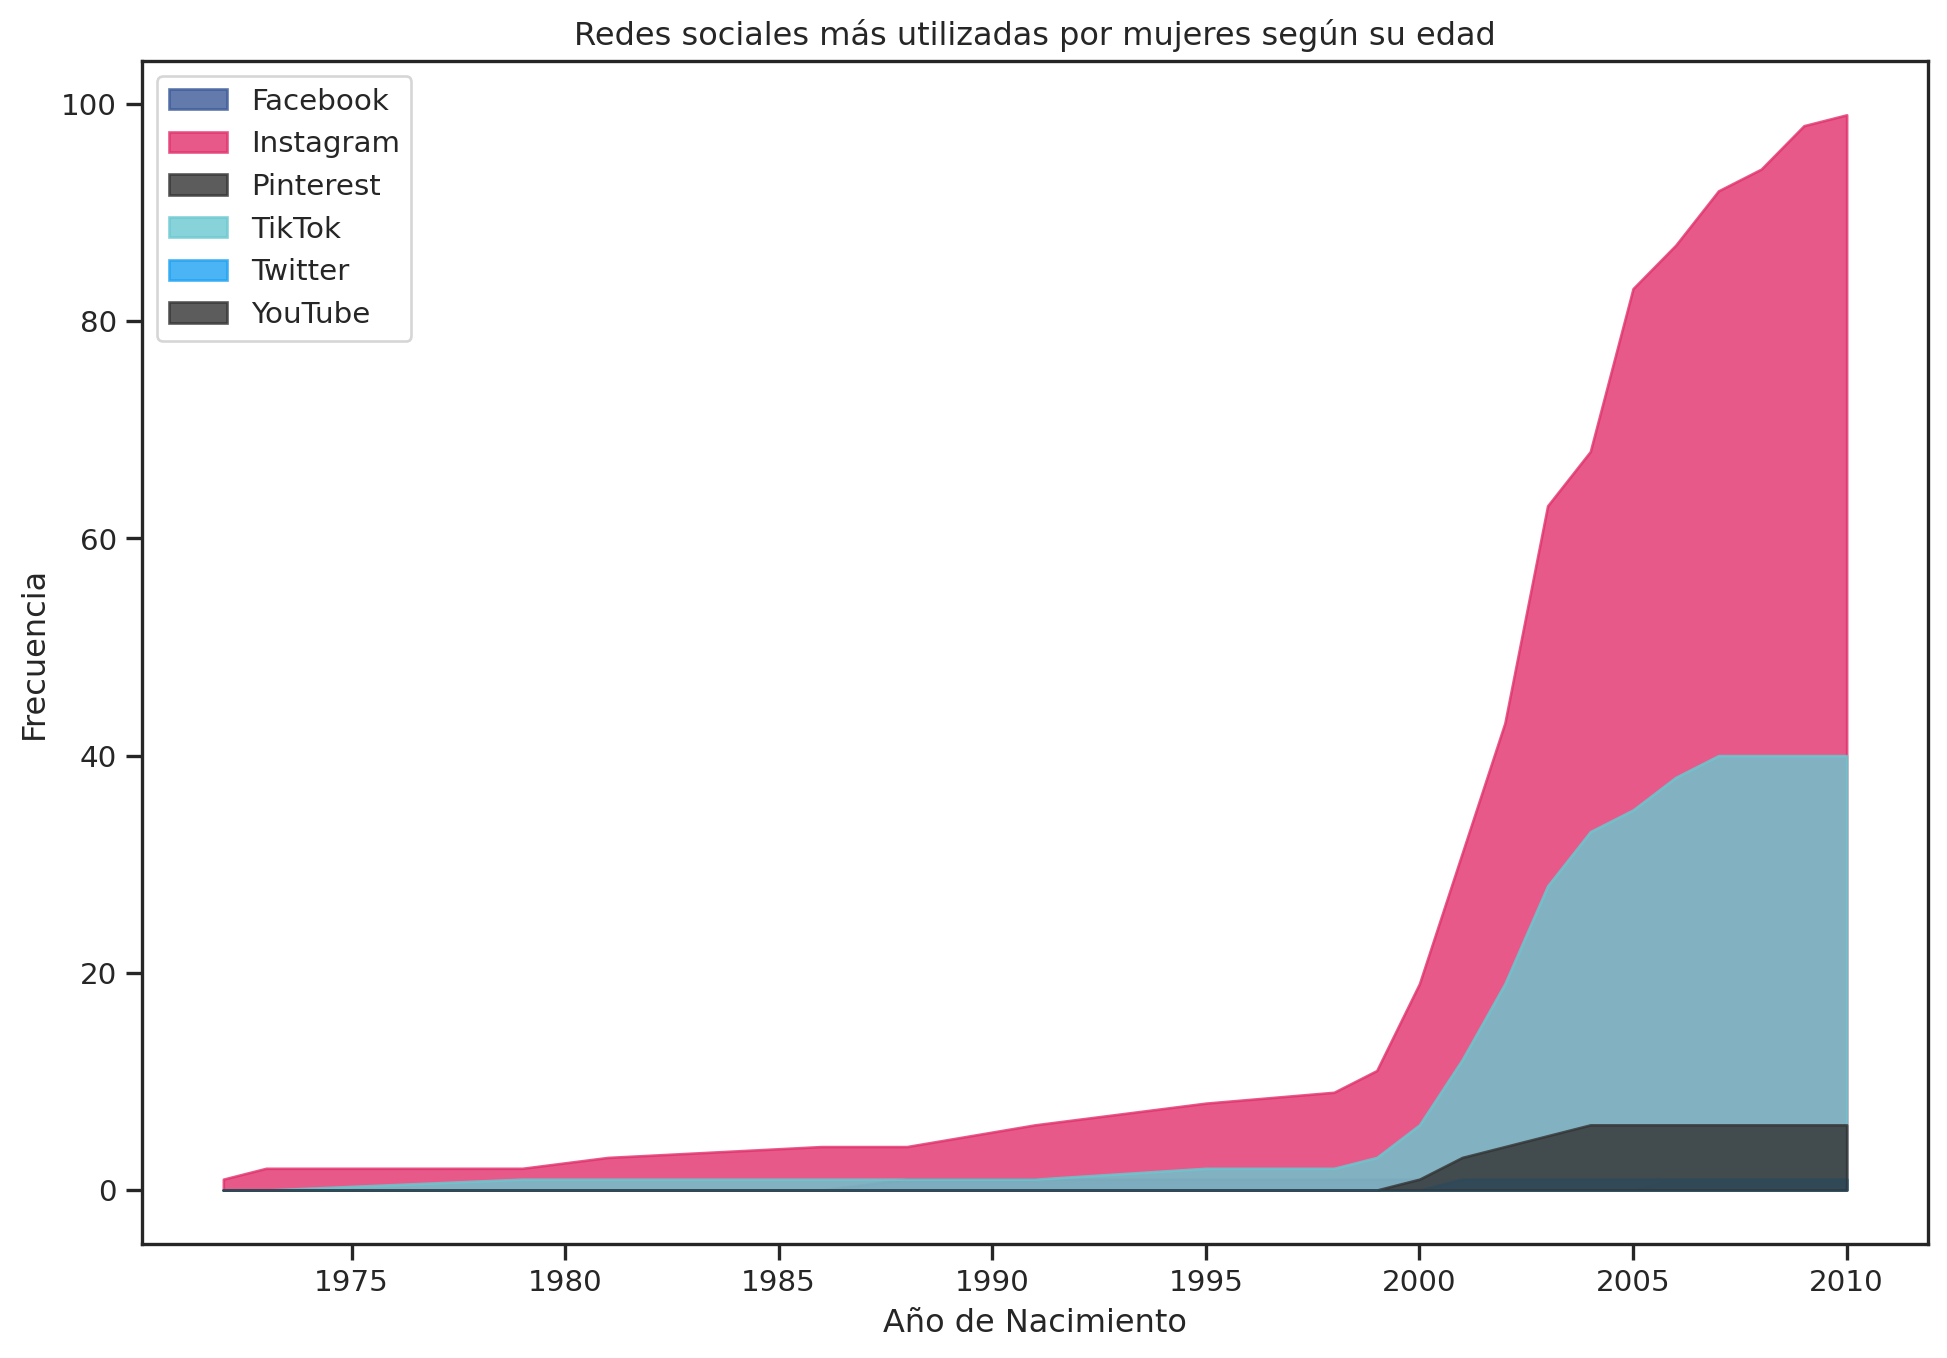

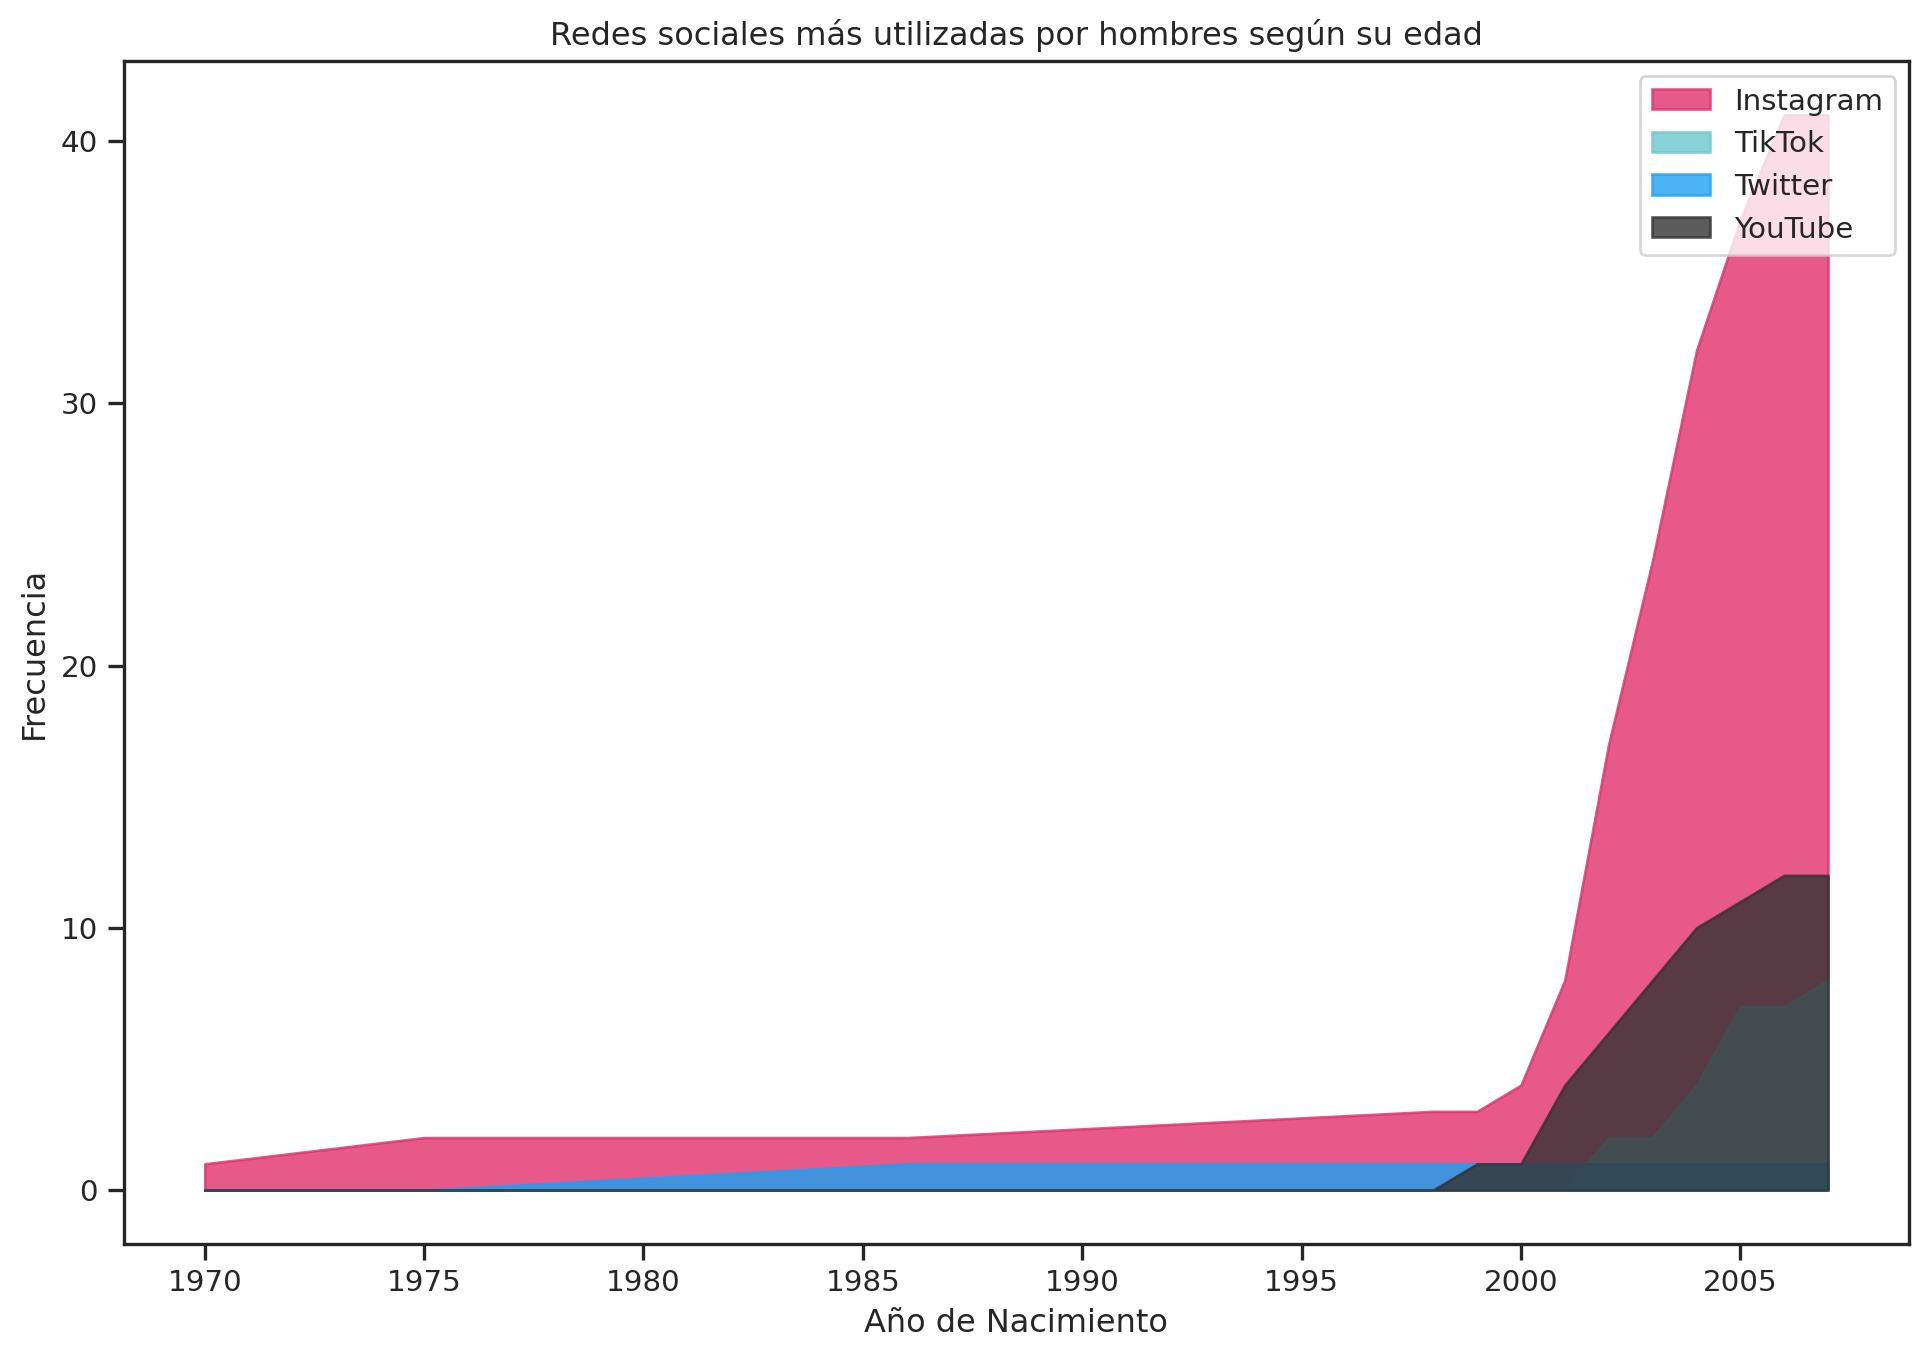

In [19]:
# Creamos paleta de colores
colores = {
    'Facebook': '#3b5998',
    'Twitter': '#1da1f2',
    'Instagram': '#e1306c',
    'LinkedIn': '#0077b5',
    'Snapchat': '#fffc00',
    'WhatsApp': '#25d366',
    'TikTok': '#69c9d0'
}

# Función para crear un gráfico de áreas apiladas
def crear_stackplot(datos, title, legend_loc, colores):
    fig, ax = plt.subplots(figsize=(12, 8))
    for column in datos.columns:
        ax.fill_between(datos.index, datos[column].cumsum(), label=column, color=colores.get(column, '#333333'), alpha=0.8)
    ax.set_xlabel("Año de Nacimiento")
    ax.set_ylabel("Frecuencia")
    ax.set_title(title)
    ax.legend(loc=legend_loc)
    plt.show()

# Ejemplo de datos (fem1 y masc1 deben ser definidos previamente)
# fem1 y masc1 deben tener años de nacimiento como índice y columnas de redes sociales
# Crear el gráfico para 1920-1970
crear_stackplot(fem1, "Redes sociales más utilizadas por mujeres según su edad", 'upper left', colores)

# Crear el gráfico para 1971-2020
crear_stackplot(masc1, "Redes sociales más utilizadas por hombres según su edad", 'upper right', colores)

# Visualización Compleja 3
Se realiza un mapa de calor de las regiones de Chile junto con la percepción de afección que tienen las rrss en las personas

In [ ]:
#Instalando una libreria util para hacer un heatmap
!pip install folium
import folium
#Importando Heatmap de Folium
from folium.plugins import HeatMap
#Importando pandas
import pandas as pd

In [ ]:
#Revisando Los nombres puestos para las diferentes regiones
rrss['¿Región donde vives?'].unique()

In [ ]:
#Se definen las latitudes y longitudes de las diferentes regiones chilenas
regiones_coords = {
    'Región de Arica y Parinacota': [-18.4746, -70.2979],
    'Región de Tarapacá': [-20.2133, -70.1513],
    'Región de Antofagasta': [-23.6500, -70.4000],
    'Región de Atacama': [-27.3667, -70.3333],
    'Región de Coquimbo': [-29.9533, -71.3380],
    'Región de Valparaíso': [-33.0472, -71.6127],
    'Región Metropolitana': [-33.4489, -70.6693],
    'Región de O’Higgins': [-34.1708, -70.7416],
    'Región del Maule': [-35.4263, -71.6554],
    'Región del Ñuble': [-36.7226, -71.9971],
    'Región del Biobío': [-36.8201, -73.0443],
    'Región de La Araucanía': [-38.7359, -72.5904],
    'Región de Los Ríos': [-39.8196, -73.2452],
    'Región de Los Lagos': [-41.4717, -72.9399],
    'Región de Aysén': [-45.5752, -72.0662],
    'Región de Magallanes': [-53.1625, -70.9070]
}


In [ ]:
#Se asocian los datos de las coordinadas a cada Regin del dataframe
rrss['lat'] = rrss['¿Región donde vives?'].map(lambda x: regiones_coords.get(x, [None, None])[0])
rrss['lon'] = rrss['¿Región donde vives?'].map(lambda x: regiones_coords.get(x, [None, None])[1])
#Se utiliza la funcion dropna para borrar los datos nulos
rrss = rrss.dropna(subset=['lat', 'lon'])


In [ ]:
#El enfoque del mapa que se hara en breves
mapa = folium.Map(location=[-33.4489, -70.6693], zoom_start=5)
# Los datos de impacto que mostraran que tan "Caliente" es cada sector
heat_data = [[row['lat'], row['lon'], row['Del 1 al 5 ¿Cuánto crees que las redes sociales han afectado la salud mental de las personas?']] for index, row in rrss.iterrows()]
#Se añade la funcion de heatmap al mapa
HeatMap(heat_data).add_to(mapa)
mapa